# Background 

This is a fictional data set created by IBM data scientists that talks about attrition. According to investopedia attrition is defined as the reduction in staff and employees through normal means such as retirement and resignation, the loss or clients or customers due to old age or growing out of the target demographic. 

I'm going to use this dataset to select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based the data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify the reasoning.

The dataset can be found here: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# Set the plot background.
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('IBM HR Analytics Employee Attrition.csv')

In [3]:
# Determine which categorical and continuous variables to use.
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Determine how big my dataset is.
df.shape

(1470, 35)

In [5]:
print(list(df))

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


The outcome variable will be attrition. 

- Categorical: Attrition, Gender
- Continuous: Age, Years at Company, Monthly Income

What are the factors that are related to attrition?

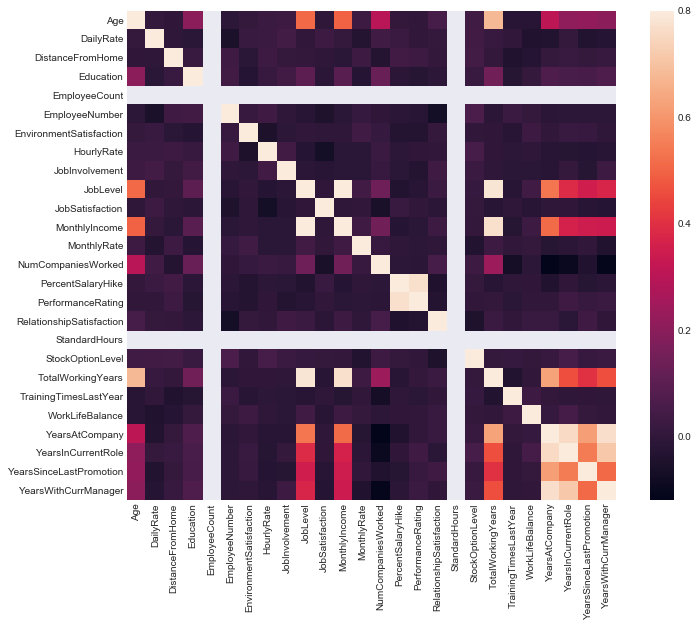

In [6]:
# Checking out the initial correlation of the data set presented.
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

- Employee count and standard hours are grayed out for some reason. 
- It seems that the variables I'm interested in (YearsAtCompany, YearsInCurrentRole) are somewhat related.
- Too much noise though so lets limit the data and then do it again.

In [7]:
# Create a new dataframe to have only the data I want to analyze. 
df2 = pd.DataFrame()
df2 = df.loc[:, ['Age', 'Attrition', 'Department', 'Gender', 'YearsAtCompany', 'MonthlyIncome']]

In [8]:
df2.head()

,Age,Attrition,Department,Gender,YearsAtCompany,MonthlyIncome
0,41,Yes,Sales,Female,6,5993
1,49,No,Research & Development,Male,10,5130
2,37,Yes,Research & Development,Male,0,2090
3,33,No,Research & Development,Female,8,2909
4,27,No,Research & Development,Male,2,3468


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


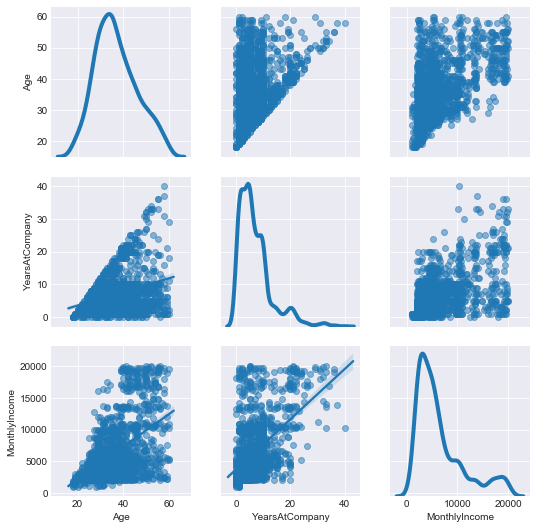

In [9]:
# Next let see what initial correlation we can glean from the existing continuous data. 
g = sns.PairGrid(df2.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=.5))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=4)
plt.show()

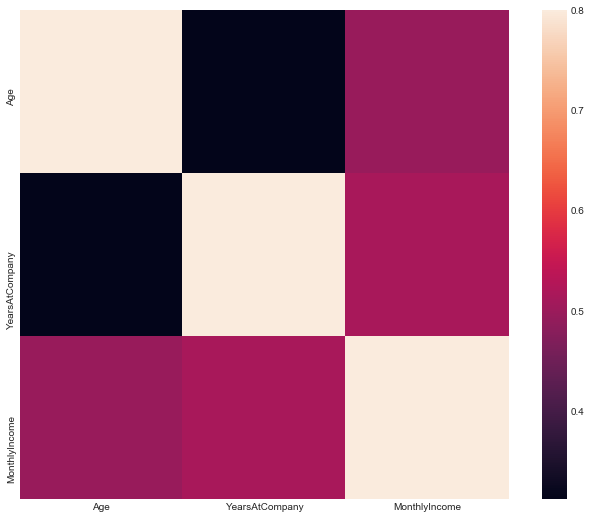

                     Age  YearsAtCompany  MonthlyIncome
Age             1.000000        0.311309       0.497855
YearsAtCompany  0.311309        1.000000       0.514285
MonthlyIncome   0.497855        0.514285       1.000000


In [10]:
# Lets look at the heatmap one more time
corrmat = df2.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

print(corrmat)

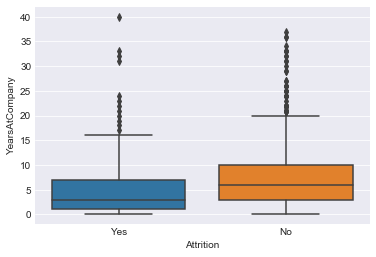

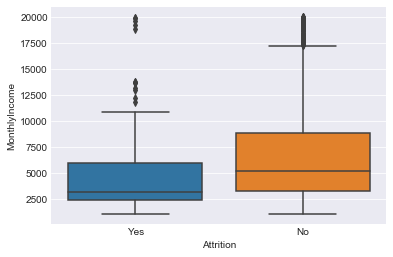

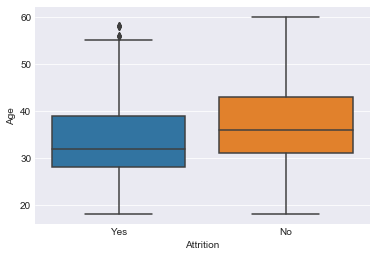

In [11]:
# Plot categorical data with continuous data using box - plots.
#Make a four-panel plot.
sns.boxplot(x = df2['Attrition'], y = df2['YearsAtCompany'])
plt.show()

sns.boxplot(x = df2['Attrition'], y = df2['MonthlyIncome'])
plt.show()

sns.boxplot(x = df2['Attrition'], y = df2['Age'])
plt.show()

- There are a lot of outliers for Years at Company and Monthly Income, but not for age. 
- I'm surprised by how early it seems that employees resign or retire.
- There are probably short term jobs for Years in the company which would explain the high turnover rate or it might be that some people don't get far so they leave. 
- The majority of people that retire or resign have a lower monthly income which is also reasonable. 

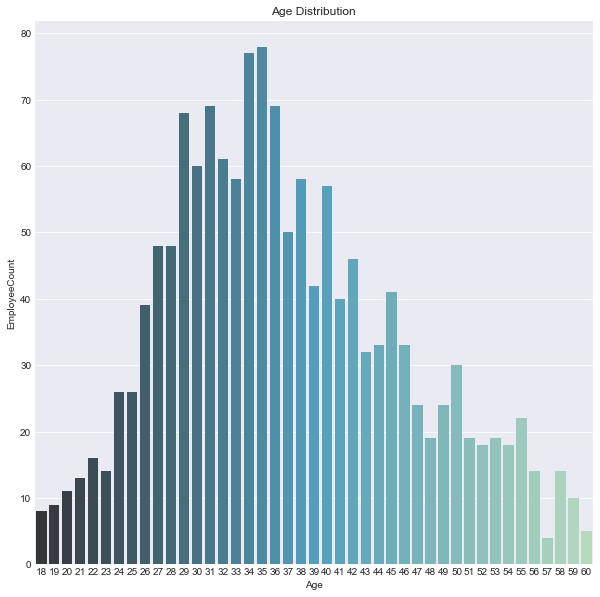

In [12]:
# It's time to check if the distribution of my continuous data has a normal distribution or not. 
s = df.groupby('Age').count()['EmployeeCount']
g = sns.barplot(s.index, s, palette='GnBu_d')
g.figure.set_size_inches(10,10)
g.set_title("Age Distribution")
sns.set_style('darkgrid')
plt.show()

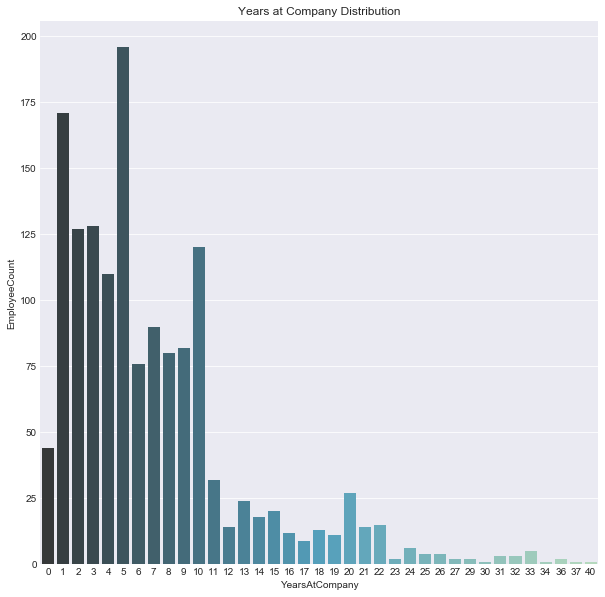

In [13]:
# Years at Company
s = df.groupby('YearsAtCompany').count()['EmployeeCount']
g = sns.barplot(s.index, s, palette='GnBu_d')
g.figure.set_size_inches(10,10)
g.set_title("Years at Company Distribution")
plt.show()

- For sure, monthly income will not have a normal distribution.
- Age is the closest thing to a normal distribution and Years at a Company looks like an exponential curve. 
- If I took the mean and standard deviation of each category and plotted it, I could make a normal distribution. 

In [14]:
df2.groupby('Attrition').describe()

Age                                                    \
            count       mean      std   min   25%   50%   75%   max   
Attrition                                                             
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0   
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0   

          MonthlyIncome               ...                   YearsAtCompany  \
                  count         mean  ...      75%      max          count   
Attrition                             ...                                    
No               1233.0  6832.739659  ...   8834.0  19999.0         1233.0   
Yes               237.0  4787.092827  ...   5916.0  19859.0          237.0   

                                                          
               mean       std  min  25%  50%   75%   max  
Attrition                                                 
No         7.369019  6.096298  0.0  3.0  6.0  10.0  37.0  
Yes        5.130802  5.949984  0.0  1.0  3.0   7.0  40.0  

[2 rows x 24 columns]

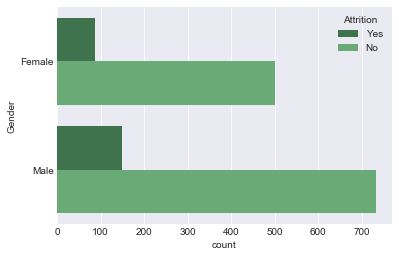

Attrition   No  Yes
Gender             
Female     501   87
Male       732  150
Power_divergenceResult(statistic=752.8408163265306, pvalue=7.304007796791317e-163)


In [15]:
# Two Categorical Variables (Gender & Attrition)

# Plot counts for each combination of levels.
sns.countplot(y="Gender", hue="Attrition", data=df, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df['Gender'], df['Attrition'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

- Perform a chi square test on gender and attrition since both are categorical variables. 
- Going to see whetber tbe difference in group size attritions are large enough to reflect on the population size.
- intial hypothesis is that there is no difference between attrition and gender.
- p value is <.05 which tells us that there is a significant difference between gender and attrition groups.

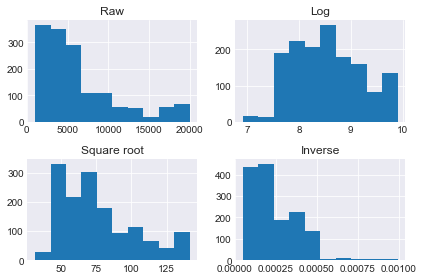

In [19]:
# Try different graphs to standardize MonthlyIncome first 
# since there were no graphs for MonthlyIncome. 

# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['MonthlyIncome'].dropna())
plt.title('Raw')

# Feat 1 Log of Monthly Income to see if the values would become a normal distribution.
df['feat1'] = np.log(df['MonthlyIncome'])
fig.add_subplot(222)
plt.hist(np.log(df['MonthlyIncome'].dropna()))
plt.title('Log')

# Feat2, Sqrt of Monthly Income to see if values can become normalized.
df['feat2'] = np.sqrt(df['MonthlyIncome'])
fig.add_subplot(223)
plt.hist(np.sqrt(df['MonthlyIncome'].dropna()))
plt.title('Square root')

# Feat3, Inverse of Monthly Income to see if values can become normalized.
df['feat3'] = (1/df['MonthlyIncome'])
ax3=fig.add_subplot(224)
plt.hist(1/df['MonthlyIncome'].dropna())
plt.title('Inverse')
plt.tight_layout()
plt.show()


In [56]:
# Feat4, Square of Monthly Income to see if values can become normalized.
df['feat4'] = np.square(df['MonthlyIncome'])

# Feature 5. Standardize my three original features since the earlier Monthly Income
# didn't seem to do much.
from sklearn.preprocessing import StandardScaler
features = ['YearsAtCompany', 'Age', 'MonthlyIncome']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Attrition']].values
# Standardizing the features
X = StandardScaler().fit_transform(x)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

#Print the eigenvectirs and eigenvalues.
eig_vals, eig_vecs = np.linalg.eig(Cx)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance Matrix:
 [[1.00068074 0.31152069 0.51463492]
 [0.31152069 1.00068074 0.49819347]
 [0.51463492 0.49819347 1.00068074]]
Eigenvectors 
[[-0.55484356 -0.68824313 -0.46740777]
 [-0.54624775  0.72512556 -0.41929264]
 [-0.6275046  -0.02267862  0.7782825 ]]

Eigenvalues 
[1.88940558 0.68942386 0.42321276]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


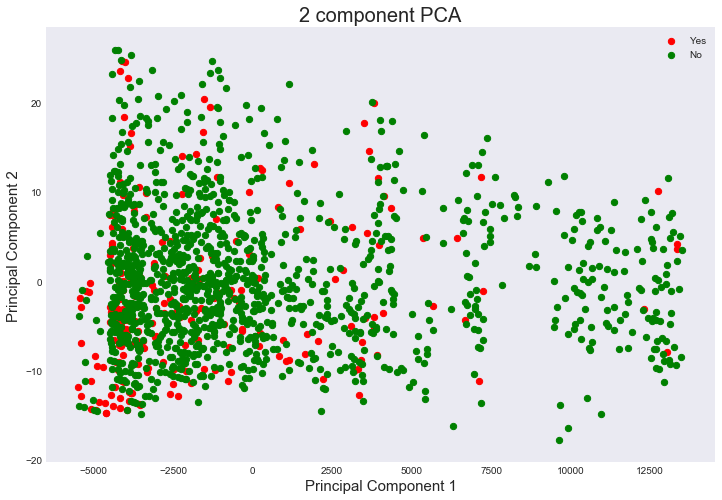

In [82]:
# Use sklearn to perform PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['Attrition']]], axis = 1)

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Yes', 'No']
colors = ['r', 'g']
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['Attrition'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 40)
ax.legend(targets)
ax.grid()

In [ ]:
# Feature 6 Monthly Income divide by age so that we can see the avg income of each age.
df2['feat6'] = df['MonthlyIncome']/ df['Age'] 

This will give us a better look of the different levels of attrition within this feature.

In [ ]:
#Feature 7: Group ages together, as more datapoints in a group should prevent defaults from 
# skewing rates in small populations

# Set a default value
df2['feat7'] = '0'
# Set Age_Group value for all row indexes which Age is LT 18
df2['feat7'][df2['Age'] <= 18] = 'LTE 18'
# Same procedure for other age groups
df2['feat7'][(df2['Age'] > 18) & (df2['Age'] <= 30)] = '19-30'
df2['feat7'][(df2['Age'] > 30) & (df2['Age'] <= 45)] = '31-45'
df2['feat7'][(df2['Age'] > 46) & (df2['Age'] <= 64)] = '46-64' 
df2['feat7'][(df2['Age'] > 65)] = '65+'


# Picking a filtering method. 

Using an embedded method will probably be best since it provides the benefits of the wrapper method but isn't as computationally intensive so this method will select useful sets of features that effectively predict outcomes without the drawback of the wrapper method. 